In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import mkl

#mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    img_matrix = np.empty(shape=(rows_count * (tile_height + space_between_tiles) - space_between_tiles,  
                                 cols_count * (tile_width + space_between_tiles) - space_between_tiles))
    img_matrix.fill(np.nan)

    for r in range(rows_count):
        for c in range(cols_count):
            x_0 = r * (tile_height + space_between_tiles)
            y_0 = c * (tile_width + space_between_tiles)
            img_matrix[x_0:x_0 + tile_height, y_0:y_0 + tile_width] = examples[r, c]
    
    return img_matrix

## Zbiór danych MNIST

In [ ]:
#pip3 install mnist

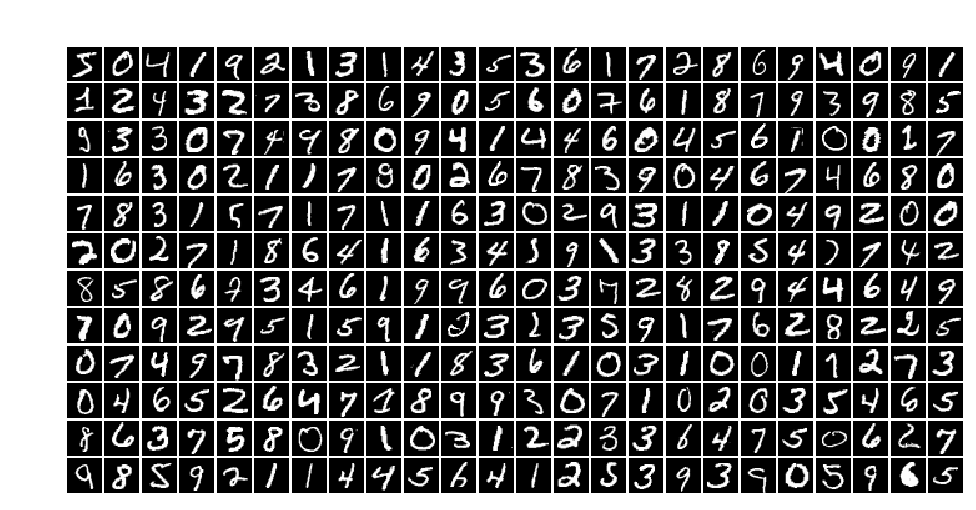

In [4]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [5]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Zmień kształt macierzy `X` w taki sposób, żeby dwa ostatnie wymiary zostały scalone w jeden wymiar

In [7]:
# X = ????
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

X = X.reshape(X.shape[0], -1) # -1 domysl sie jaki bedzie 2 wymiar

#raise Exception("Brak implementacji!")

In [8]:
X.shape

(60000, 784)

## Wizualizacja zbioru danych MNIST

Dodaj wykres scatter-plot do rysunku reprezentowanego przez zmienną `plot`. Wykres powinien:
* używać dwóch pierwszych wymiarów `X` jako współrzędnych (odpowiednio `x` i `y`),
* wyświetlać tylko te elementy z `X`, dla których zachodzi `y == i` (są to elementy należące do i-tej klasy),
* wyświetlać wartość zmiennej `i` w legendzie.

In [15]:
a = np.array([1, 5, 7, 2, 1, 0])

In [16]:
a

array([1, 5, 7, 2, 1, 0])

In [17]:
a == 1

array([ True, False, False, False,  True, False])

In [18]:
np.where(a == 1)

(array([0, 4]),)

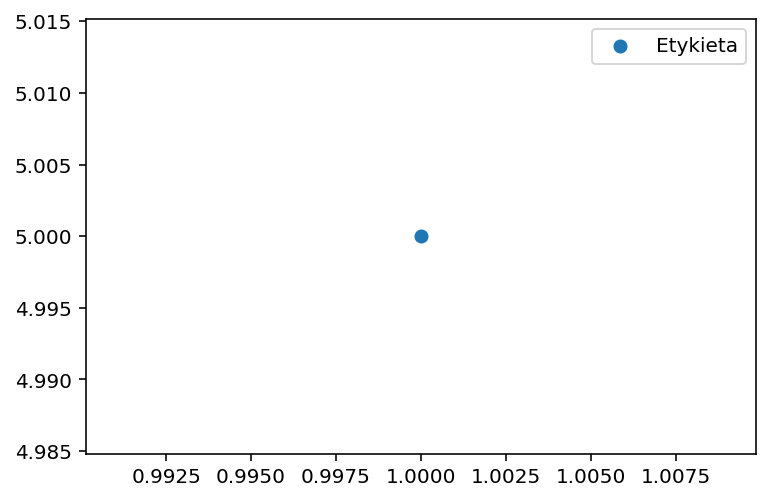

In [20]:
fig, plot = plt.subplots()
plot.scatter(1, 5, label='Etykieta')
plt.legend()

In [21]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        # digit_indeces = ???
        # dim1 = ???
        # dim2 = ???
        # plot.scatter(???)
        digit_indices = np.where(y == i)
        dim1 = X[digit_indices, 0]
        dim2 = X[digit_indices, 1]
        plot.scatter(dim1, dim2, label=i)
        
        #raise Exception("Brak implementacji!")

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Analiza składowych głównych (PCA)

In [10]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Użyj funkcji `PCA` aby zrzutować dane w `X_small` do dwóch wymiarów. Wynik zapisz w zmiennej `X_pca_embedded`.

In [13]:
from sklearn.decomposition import PCA

# pca = PCA(???)
# X_pca_embedded = ???

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small) # dopasuj i zwroc wspolrzedne

#raise Exception("Brak implementacji!")

In [14]:
X_pca_embedded.shape

(2000, 2)

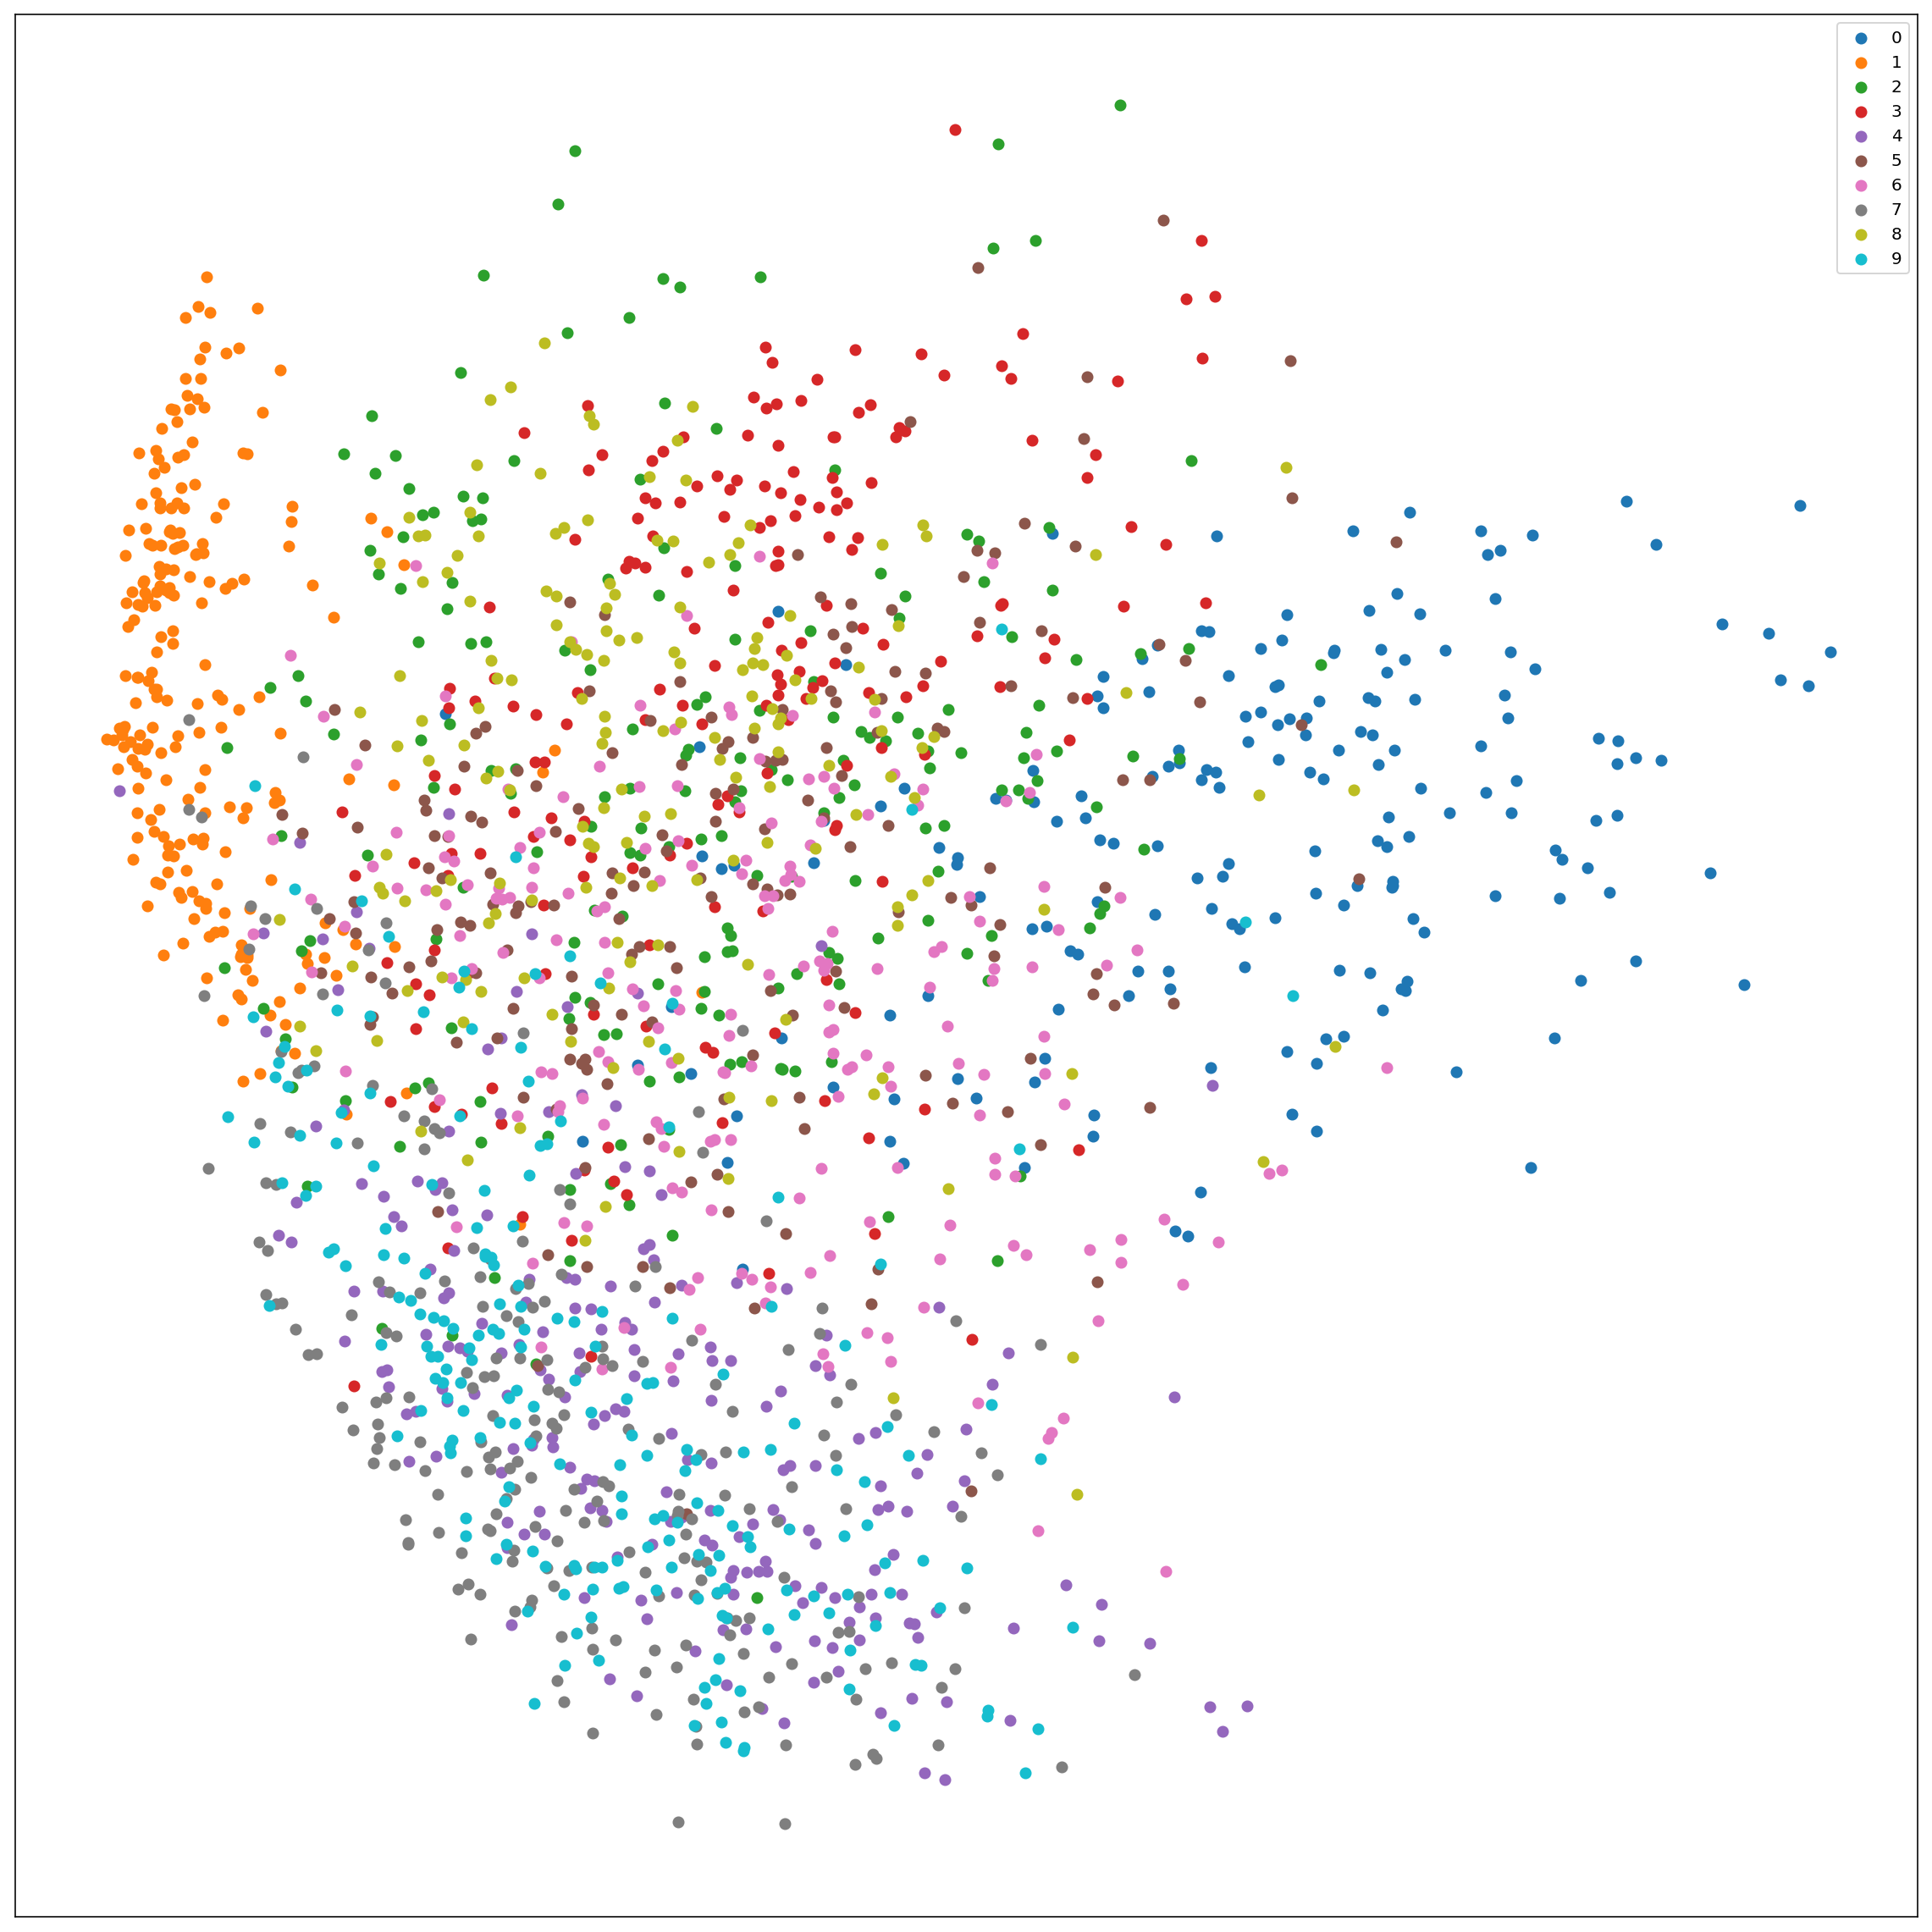

In [22]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

## Część dodatkowa

### Wizualizacja algorytmem t-distributed Stochastic Neighbour Embedding (T-SNE)

Nie zapomnij przeczytać świetnego [artykułu o T-SNE](https://distill.pub/2016/misread-tsne/).

Użyj funkcji `T-SNE` do zrzutowania danych w `X_small` do dwóch wymiarów. Zapisz wynik w `X_tsne_embedded`. <BR>
W wywołaniu `T-SNE` użyj argumentów:
 * `n_iter=500` aby ograniczyć liczbę iteracji T-SNE, 
 * `verbose=2` aby śledzić postęp algorytmu.

In [25]:
from sklearn.manifold import TSNE

# tsne = TSNE(???)
# X_tsne_embedded = ???

# transformacja nieliniowa, wiec % wyjasnionej wariancji nie bedzie dostepna
tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small) # dopasuj algorytm do danych i zwroc wspolrzedne

#raise Exception("Brak implementacji!")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.051s...
[t-SNE] Computed neighbors for 2000 samples in 5.317s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.061s
[t-SNE] Iteration 50: error = 78.0266113, gradient norm = 0.0048462 (50 iterations in 0.457s)
[t-SNE] Iteration 100: error = 75.8543701, gradient norm = 0.0121430 (50 iterations in 0.431s)
[t-SNE] Iteration 150: error = 75.6827698, gradient norm = 0.0083595 (50 iterations in 0.370s)
[t-SNE] Iteration 200: error = 75.6750336, gradient norm = 0.0039207 (50 iterations in 0.375s)
[t-SNE] Iteration 250: error = 75.6567383, gradient norm = 0.0066999 (50 iterations in 0.415s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.656738
[t-SNE] Iteration 300: error = 1.4830620, gradient norm = 0.0010346 (50 iterations in 0.366s)

In [26]:
X_tsne_embedded.shape

(2000, 2)

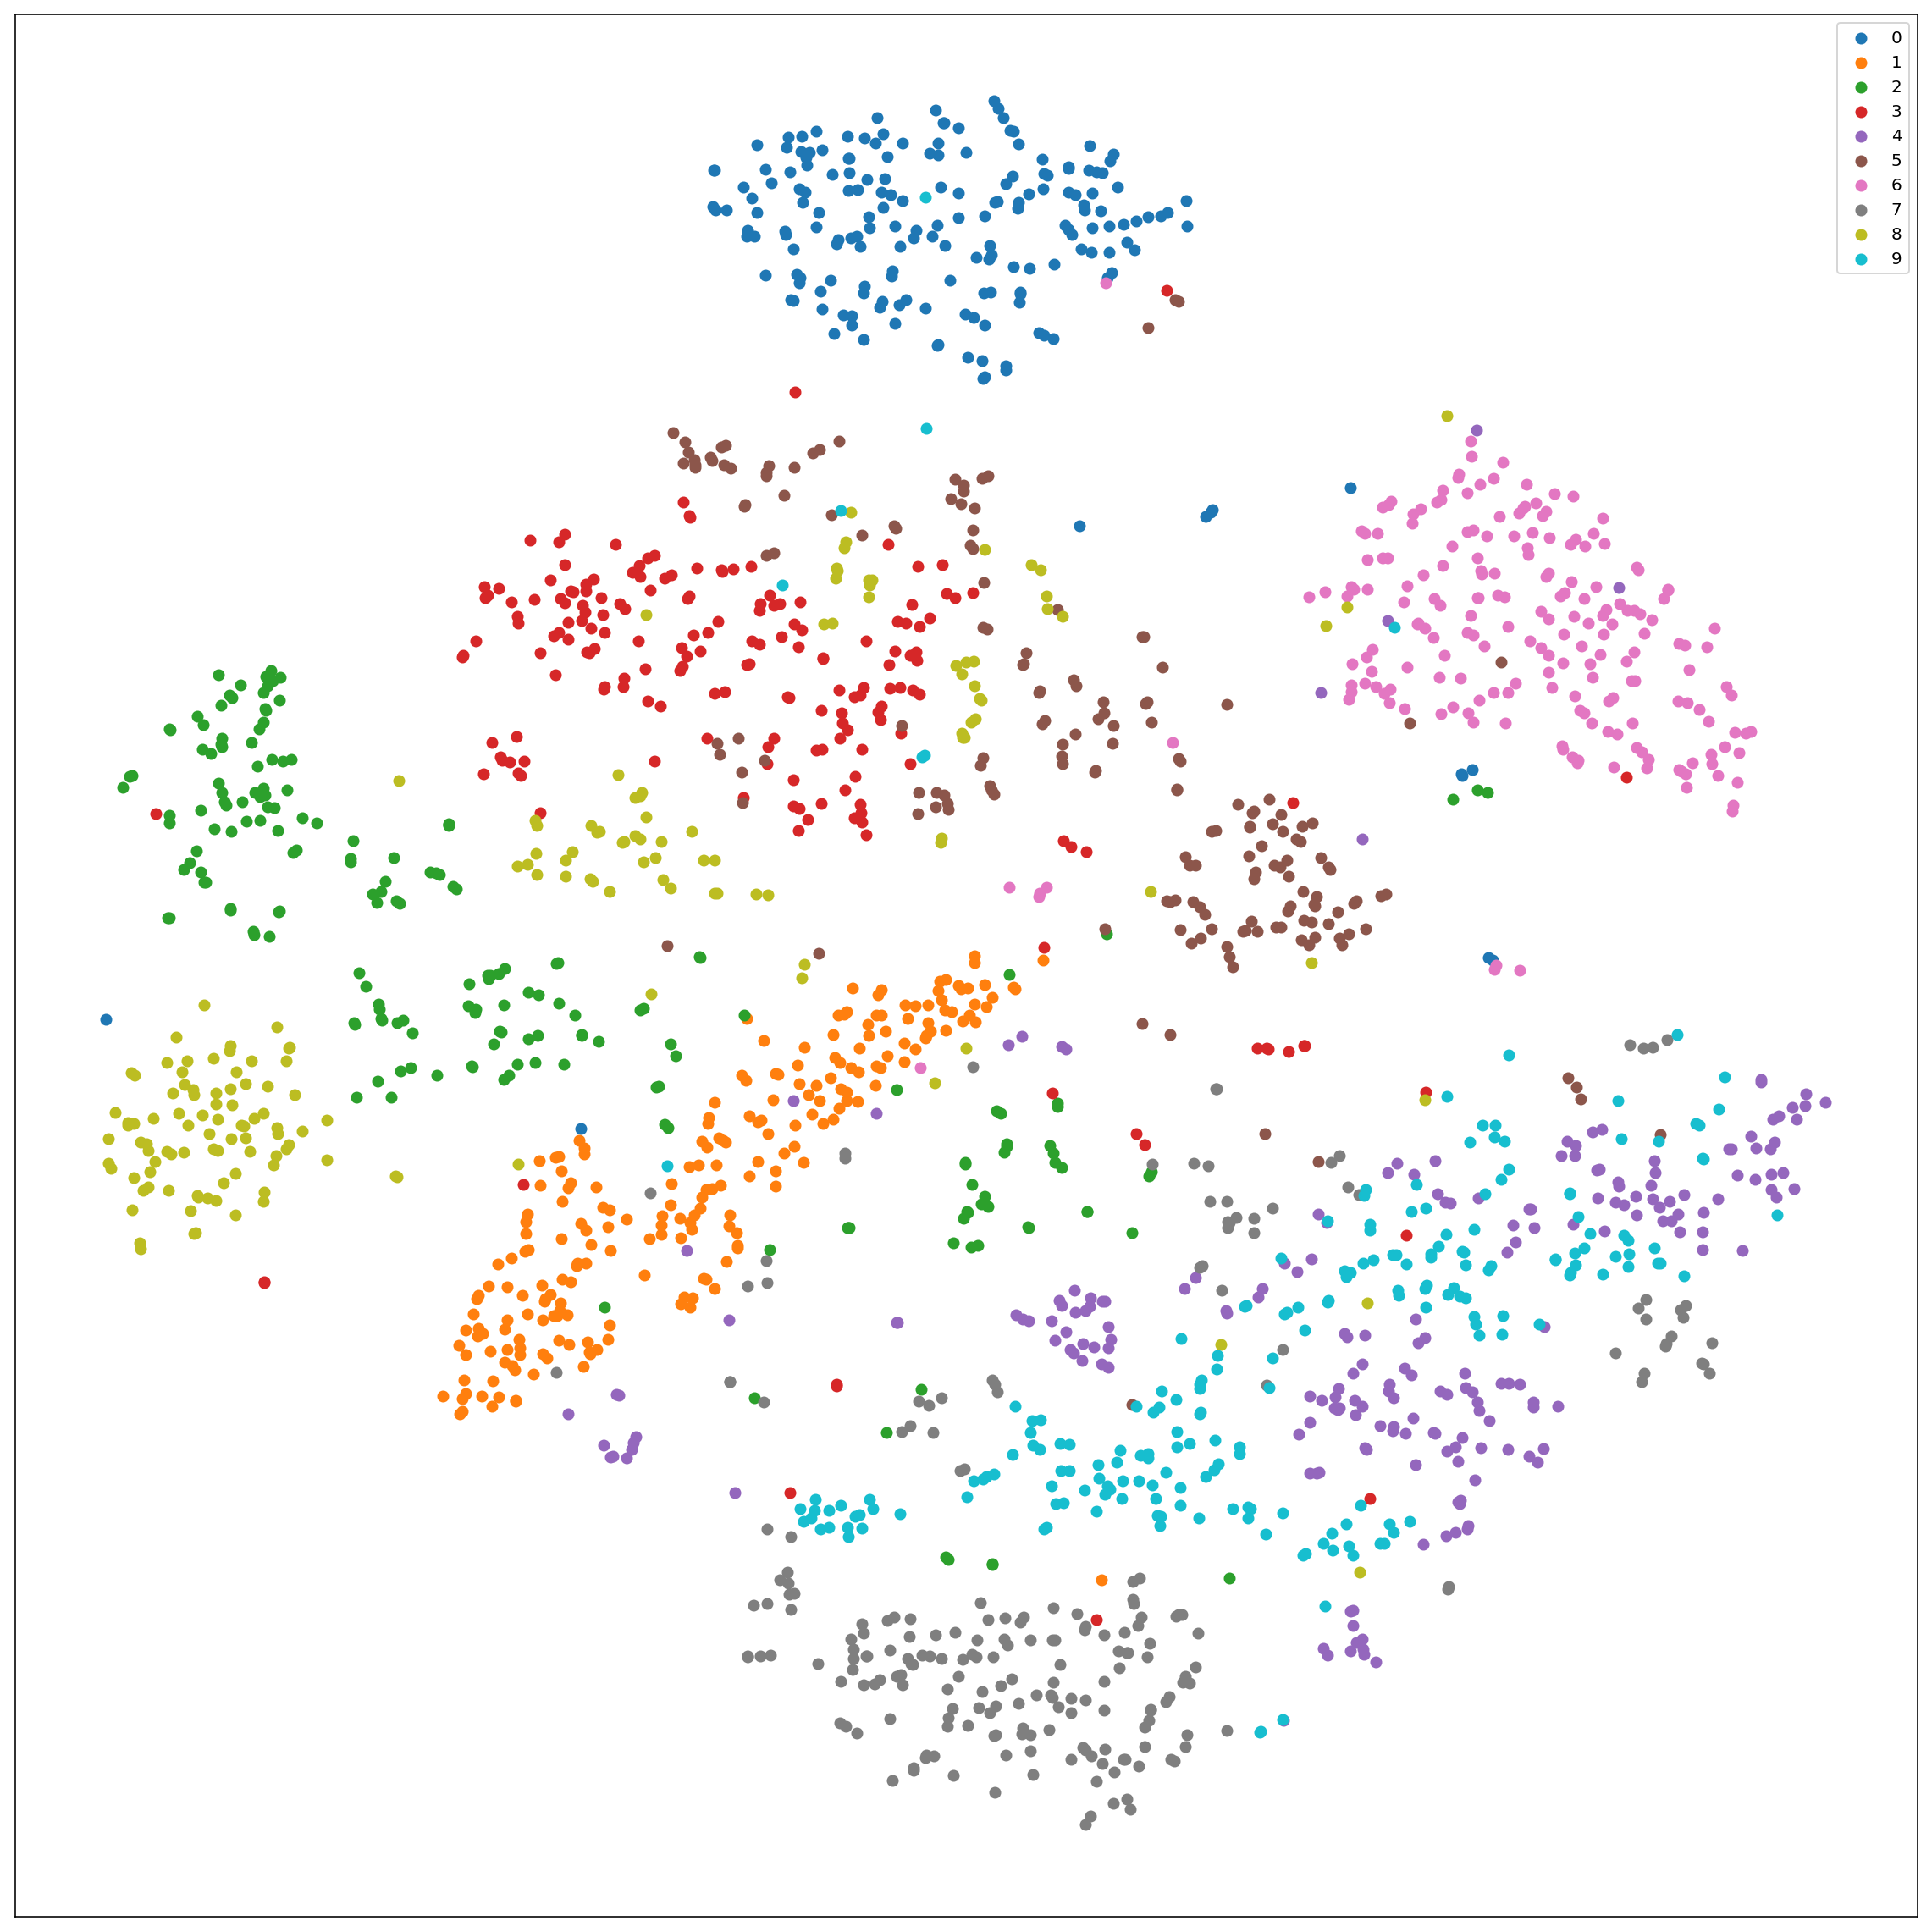

In [27]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### Klasyfikacja cyferek MNIST algorytmem SVM

In [ ]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [ ]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Wylicz i wyświetl macierz pomyłek dla `predicted` (predykcje SVM) i `y_test` (prawdziwe etykiety). Aby wyliczyć macierz pomyłek skorzystaj z pakietu `metrics`

In [ ]:
# confusion_matrix = ???

raise Exception("Brak implementacji!")

print("Confusion matrix:\n{}".format(confusion_matrix))